In [98]:
#Install Packages

#pip install openpyxl
#pip install pandas
#pip install matplotlib
#pip install scipy
#pip install simplejson

In [99]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import datetime
import json
import pickle
import matplotlib.pyplot as plt

In [100]:
# Load variables from the DataAnalysis file

with open('RT_DataAnalysisVariables.pkl', 'rb') as f:
    data = pickle.load(f)

In [101]:
# Load variables from the Global_Variables file

with open('Global_Variables.pkl', 'rb') as f:
    Global_Variables = pickle.load(f)

In [102]:
#Assumptions from CHE Report

#BTC Mining
#Basis_MW = data['Basis_MW'] #MW
#Hardware_Eff = data['Hardware_Eff'] #Percentage
#W_from_Renewables = data['W_from_Renewables'] #GW
#P_from_Renewables = data['P_from_Renewables'] #GW
#P_from_Solar = data['P_from_Solar']
#Solar_Surplus = data['Solar_Surplus'] #Percentage of excess energy produced by Solar Energy
#Solar_Plant_W = data['Solar_Plant_W'] #GW

#Solar Plant
#PV_Capacity = data['PV_Capacity'] #MW Maximum capacity
#Capital_Cost_PV = data['Capital_Cost_PV'] #$/MW
#PV_Plant_Cost = data['PV_Plant_Cost'] #$

#Calculations based on Assumptions
#W_from_Solar = data['W_from_Solar']
#Global_W = data['Global_W']

#Date of data extraction from Blockchain.com
last_date = Global_Variables['last_date']

In [103]:
#Calculated in Data Analysis file
NumberofRigsPerModel = data['NumberofRigsPerModel']

In [104]:
#Data used as basis
Crypto_Data = Global_Variables['Crypto_Data']
ASIC_df = Crypto_Data

#Bitcoin Data
hashrate_BTC = Global_Variables['hashrate_BTC']
revenue_BTC = Global_Variables['revenue_BTC']

#JSON file paths
file_paths = [hashrate_BTC,revenue_BTC]

In [105]:
#Considering that 
ASIC_df['NumberOfRigs'] = ASIC_df['Model'].map(NumberofRigsPerModel)

ASIC_df['Total Hashrate (Th/s)'] = ASIC_df['Hashrate (Th/s)']*ASIC_df['NumberOfRigs']

#Once off
ASIC_df['CapitalCost (000 $)'] = ASIC_df['NumberOfRigs']*ASIC_df['Price ($)']/1000

ASIC_df.head()

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,NaN,NaN,NaN
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,NaN,NaN,NaN
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,NaN,NaN,NaN
3,MicroBT WhatsMiner M66S,01-Nov-23,298.0,5513.0,SHA-256,15.51,-15.88,-0.37,15.51,0.019,9649.0,50.0,hydrocooling,AsicMarketPlace,622.114765,ASIC,NaN,NaN,NaN
4,Bitmain Antminer S21 Pro (234Th),01-Jul-24,234.0,3531.0,SHA-256,12.18,-10.17,2.01,12.18,0.015,5029.0,75.0,2 fans,AsicMarketPlace,412.889984,ASIC,NaN,NaN,NaN


In [106]:
ASIC_df.columns

Index(['Model', 'Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)', 'With Electricity',
       'Without Electricity', 'Efficiency (j/Gh)', 'Price ($)', 'Noise db',
       'Cooling', 'Seller', 'Days to Breakeven', 'Rig Type', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)'],
      dtype='object')

In [107]:
temp_ASIC_df = ASIC_df.copy()

In [108]:
old_column_names = ['Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)',
       'With Electricity', 'Without Electricity',
       'Efficiency (j/Gh)', 'Price ($)', 'Noise db', 'Cooling', 'Seller',
       'Days to Breakeven', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)']

new_column_names = ['Release', 'Hashrate(Th/s)','Power(W)','Algorithm',
        'Income($/day)','ElectricityCost($/day)',
        'WithElectricity','WithoutElectricity',
        'Efficiency(j/Gh)','Price($)','Noisedb','Cooling','Seller',
        'DaystoBreakeven','NumberOfRigs',
        'TotalHashrate(Th/s)','CapitalCost(000)']

In [109]:
temp_ASIC_df[new_column_names] = temp_ASIC_df[old_column_names]

dicts = {}

for col in new_column_names:
    dict_name = f"dict_{col}"
    dicts[dict_name] = temp_ASIC_df.set_index('Model')[col].to_dict()

for name, dictionary in dicts.items():
    print(f"{name} -> {dictionary}")


dict_Release -> {'MicroBT WhatsMiner M63S': '01-Nov-23', 'Bitmain Antminer S21 Hyd (335Th)': '01-Feb-24', 'MicroBT WhatsMiner M63': '01-Nov-23', 'MicroBT WhatsMiner M66S': '01-Nov-23', 'Bitmain Antminer S21 Pro (234Th)': '01-Jul-24', 'Bitmain Antminer S21 (200Th)': '01-Feb-24', 'Bitmain Antminer T21 (190Th)': '01-Feb-24', 'MicroBT WhatsMiner M60S': '01-Feb-24', 'Canaan Avalon A1566': '01-Oct-24', 'MicroBT WhatsMiner M60': '01-Feb-24', 'Bitmain Antminer S19j Pro (104Th)': '01-Jul-21', 'Bitmain Antminer S19 Pro (110Th)': '01-May-20', 'Core i7 950': '2009', 'Atom N450': '2009', 'ATI 4850': '2010', 'ATI 5770': '2010', 'The Single': '2011', 'Rig Box': '2011'}
dict_Hashrate(Th/s) -> {'MicroBT WhatsMiner M63S': 390.0, 'Bitmain Antminer S21 Hyd (335Th)': 335.0, 'MicroBT WhatsMiner M63': 334.0, 'MicroBT WhatsMiner M66S': 298.0, 'Bitmain Antminer S21 Pro (234Th)': 234.0, 'Bitmain Antminer S21 (200Th)': 200.0, 'Bitmain Antminer T21 (190Th)': 190.0, 'MicroBT WhatsMiner M60S': 186.0, 'Canaan Avalon

In [110]:
#Function to read JSON files
def read_and_print_json(file_path):

    with open(file_path, 'r') as file:
        json_data = json.load(file)

    print(json_data)
    
    return json_data

In [111]:
#Function to convert json data to Dataframe
def process_data(category_y,category_x,json_data):
    time_series_data = json_data[category_y]

    df = pd.DataFrame(time_series_data)
    df[category_x] = df['x']
    df[category_y] = df['y']
    return df

In [112]:
#Function to add column with dates to the data
def add_dates(df,last_date):

    num_rows = df.shape[0]
    dates = pd.date_range(end=last_date, periods=num_rows)
    df['Date'] = dates

    return df

In [113]:
#Function to plot graphs for data visualization
def plot_graph(df,y_data,title,y_label):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x = df['Date']
    y = df[y_data]

    plt.plot(x, y,label=y_data, color='red')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


{'metric1': 'miners-revenue', 'metric2': 'market-price', 'miners-revenue': [{'x': 1698451200000, 'y': 31018704.384994347}, {'x': 1698537600000, 'y': 31869663.034045357}, {'x': 1698624000000, 'y': 32053239.592004847}, {'x': 1698710400000, 'y': 32663988.681133866}, {'x': 1698796800000, 'y': 33441948.513665527}, {'x': 1698883200000, 'y': 33470161.096744664}, {'x': 1698969600000, 'y': 33484481.368150137}, {'x': 1699056000000, 'y': 32987416.154812064}, {'x': 1699142400000, 'y': 33831315.08251717}, {'x': 1699228800000, 'y': 34970491.281359695}, {'x': 1699315200000, 'y': 34304247.065032534}, {'x': 1699401600000, 'y': 34048475.964370735}, {'x': 1699488000000, 'y': 34650644.88509359}, {'x': 1699574400000, 'y': 35941397.8715662}, {'x': 1699660800000, 'y': 37521879.87848707}, {'x': 1699747200000, 'y': 37752398.46864532}, {'x': 1699833600000, 'y': 38600137.92737014}, {'x': 1699920000000, 'y': 38808396.61609398}, {'x': 1700006400000, 'y': 39203968.35652012}, {'x': 1700092800000, 'y': 39445757.50334

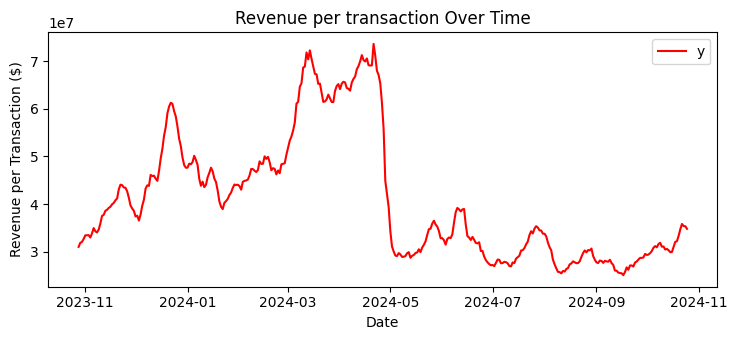

In [114]:
#Daily transaction_revenue to BTC miners across the globe
file_path = revenue_BTC
json_data = read_and_print_json(file_path)

category_y = 'miners-revenue'
category_x = 'Revenue (USD)'
df_revenue = process_data(category_y,category_x,json_data)

df_revenue = add_dates(df_revenue,last_date)

print(df_revenue.head())

y_data = 'y'
title = 'Revenue per transaction Over Time'
y_label = 'Revenue per Transaction ($)'
plot_graph(df_revenue,y_data,title,y_label)

{'metric1': 'hash-rate', 'metric2': 'market-price', 'hash-rate': [{'x': 1698451200000, 'y': 448143230.48629}, {'x': 1698537600000, 'y': 452477304.2820955}, {'x': 1698624000000, 'y': 445542786.2088067}, {'x': 1698710400000, 'y': 446432116.97122365}, {'x': 1698796800000, 'y': 460578041.84067196}, {'x': 1698883200000, 'y': 464261140.1474795}, {'x': 1698969600000, 'y': 463125882.7349779}, {'x': 1699056000000, 'y': 456708337.497233}, {'x': 1699142400000, 'y': 461884981.20968944}, {'x': 1699228800000, 'y': 474812083.2106728}, {'x': 1699315200000, 'y': 462212744.476483}, {'x': 1699401600000, 'y': 452453934.13244975}, {'x': 1699488000000, 'y': 452453934.13244975}, {'x': 1699574400000, 'y': 452010351.8440846}, {'x': 1699660800000, 'y': 459994833.0346573}, {'x': 1699747200000, 'y': 456446174.72773606}, {'x': 1699833600000, 'y': 456439922.31436163}, {'x': 1699920000000, 'y': 455681828.07999325}, {'x': 1700006400000, 'y': 460070558.7815174}, {'x': 1700092800000, 'y': 461955101.49630696}, {'x': 170

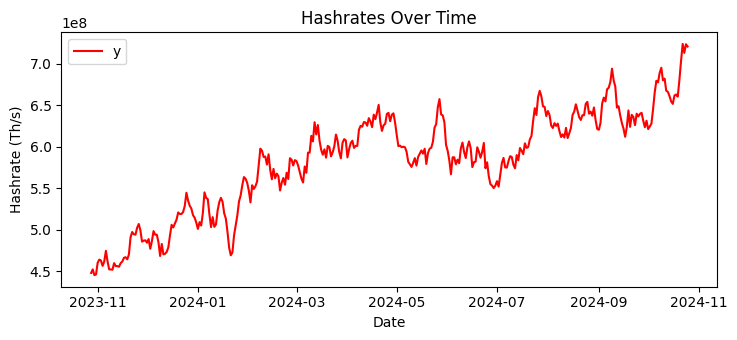

In [115]:
#Daily hasrates to BTC miners across the globe
file_path = hashrate_BTC
json_data = read_and_print_json(file_path)

category_y = 'hash-rate'
category_x = 'Revenue (USD)'
df_hr = process_data(category_y,category_x,json_data)

df_hr = add_dates(df_hr,last_date)

print(df_hr.head())

y_data = 'y'
title = 'Hashrates Over Time'
y_label = 'Hashrate (Th/s)'
plot_graph(df_hr,y_data,title,y_label)

In [116]:
#hash-rate in Th/s
#miners-revenue in USD

df = pd.merge(df_hr[['Date', 'hash-rate']], df_revenue[['Date', 'miners-revenue']], on='Date', how='inner')

df.head()


,Date,hash-rate,miners-revenue
0,2023-10-28,4.481432e+08,3.101870e+07
1,2023-10-29,4.524773e+08,3.186966e+07
2,2023-10-30,4.455428e+08,3.205324e+07
3,2023-10-31,4.464321e+08,3.266399e+07
4,2023-11-01,4.605780e+08,3.344195e+07


In [117]:
df.tail()

,Date,hash-rate,miners-revenue
359,2024-10-21,7.027137e+08,3.471964e+07
360,2024-10-22,7.236317e+08,3.583560e+07
361,2024-10-23,7.128173e+08,3.537913e+07
362,2024-10-24,7.232393e+08,3.535770e+07
363,2024-10-25,7.204847e+08,3.481178e+07


In [118]:
df['revenue per hashrate'] = df['miners-revenue'] /df['hash-rate']
df.head()

,Date,hash-rate,miners-revenue,revenue per hashrate
0,2023-10-28,4.481432e+08,3.101870e+07,0.069216
1,2023-10-29,4.524773e+08,3.186966e+07,0.070434
2,2023-10-30,4.455428e+08,3.205324e+07,0.071942
3,2023-10-31,4.464321e+08,3.266399e+07,0.073167
4,2023-11-01,4.605780e+08,3.344195e+07,0.072609


In [119]:
dict_Hashrate= dicts['dict_TotalHashrate(Th/s)']

In [120]:
for model, hashrate in dict_Hashrate.items():
    df[model] = df['revenue per hashrate'] * hashrate

df.head()

,Date,hash-rate,miners-revenue,revenue per hashrate,MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),...,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th),Core i7 950,Atom N450,ATI 4850,ATI 5770,The Single,Rig Box
0,2023-10-28,4.481432e+08,3.101870e+07,0.069216,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.781306,4.577500,13.585130,28.860996,153.567363,301.228251
1,2023-10-29,4.524773e+08,3.186966e+07,0.070434,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.812643,4.658029,13.824125,29.368731,156.268982,306.527581
2,2023-10-30,4.455428e+08,3.205324e+07,0.071942,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.851459,4.757776,14.120156,29.997635,159.615340,313.091589
3,2023-10-31,4.464321e+08,3.266399e+07,0.073167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.882979,4.838773,14.360540,30.508320,162.332658,318.421711
4,2023-11-01,4.605780e+08,3.344195e+07,0.072609,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.868616,4.801864,14.250999,30.275607,161.094405,315.992832


In [121]:
model_sums = {model: df[model].sum() for model in dict_Hashrate.keys()}

Yearly_revenue_perModel = pd.DataFrame(list(model_sums.items()), columns=['Model', 'Annual_Sum'])

Yearly_revenue_perModel.head()


,Model,Annual_Sum
0,MicroBT WhatsMiner M63S,0.0
1,Bitmain Antminer S21 Hyd (335Th),0.0
2,MicroBT WhatsMiner M63,0.0
3,MicroBT WhatsMiner M66S,0.0
4,Bitmain Antminer S21 Pro (234Th),0.0


In [122]:
ASIC_df.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,NaN,NaN,NaN
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,NaN,NaN,NaN
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,NaN,NaN,NaN


In [123]:
dict_CapitalCost= dicts['dict_CapitalCost(000)']

In [124]:
Yearly_revenue_perModel['Capital_Cost ($000)'] = Yearly_revenue_perModel['Model'].map(dict_CapitalCost)
Yearly_revenue_perModel['Capital_Cost'] = Yearly_revenue_perModel['Capital_Cost ($000)']*1000

Yearly_revenue_perModel['Payback_Period'] = Yearly_revenue_perModel['Capital_Cost']/Yearly_revenue_perModel['Annual_Sum']
Yearly_revenue_perModel.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,0.0,NaN,NaN,NaN
1,Bitmain Antminer S21 Hyd (335Th),0.0,NaN,NaN,NaN
2,MicroBT WhatsMiner M63,0.0,NaN,NaN,NaN
3,MicroBT WhatsMiner M66S,0.0,NaN,NaN,NaN
4,Bitmain Antminer S21 Pro (234Th),0.0,NaN,NaN,NaN


In [125]:
ASIC_df = ASIC_df.merge(Yearly_revenue_perModel[['Model', 'Payback_Period']], on='Model')
ASIC_df.head()


,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $),Payback_Period
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,NaN,NaN,NaN,NaN
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,NaN,NaN,NaN,NaN
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,NaN,NaN,NaN,NaN
3,MicroBT WhatsMiner M66S,01-Nov-23,298.0,5513.0,SHA-256,15.51,-15.88,-0.37,15.51,0.019,9649.0,50.0,hydrocooling,AsicMarketPlace,622.114765,ASIC,NaN,NaN,NaN,NaN
4,Bitmain Antminer S21 Pro (234Th),01-Jul-24,234.0,3531.0,SHA-256,12.18,-10.17,2.01,12.18,0.015,5029.0,75.0,2 fans,AsicMarketPlace,412.889984,ASIC,NaN,NaN,NaN,NaN


In [126]:
# Identify the model with the minimum payback period
min_payback_idx = ASIC_df['Payback_Period'].idxmin()
min_payback_row = ASIC_df.loc[min_payback_idx]

min_payback_model = min_payback_row['Model']
min_payback_value = min_payback_row['Payback_Period']
min_payback_releasedate = min_payback_row['Release']

# Display the model with the minimum payback period and its value
print(f"Model with minimum payback period: {min_payback_model}")
print(f"Release Date of Model with minimum payback period: {min_payback_releasedate}")
print(f"Minimum payback period: {min_payback_value}")

Model with minimum payback period: Rig Box
Release Date of Model with minimum payback period: 2011
Minimum payback period: 69.39550140252615


C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_25760\765424767.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_column] = pd.to_datetime(df[release_column])
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values

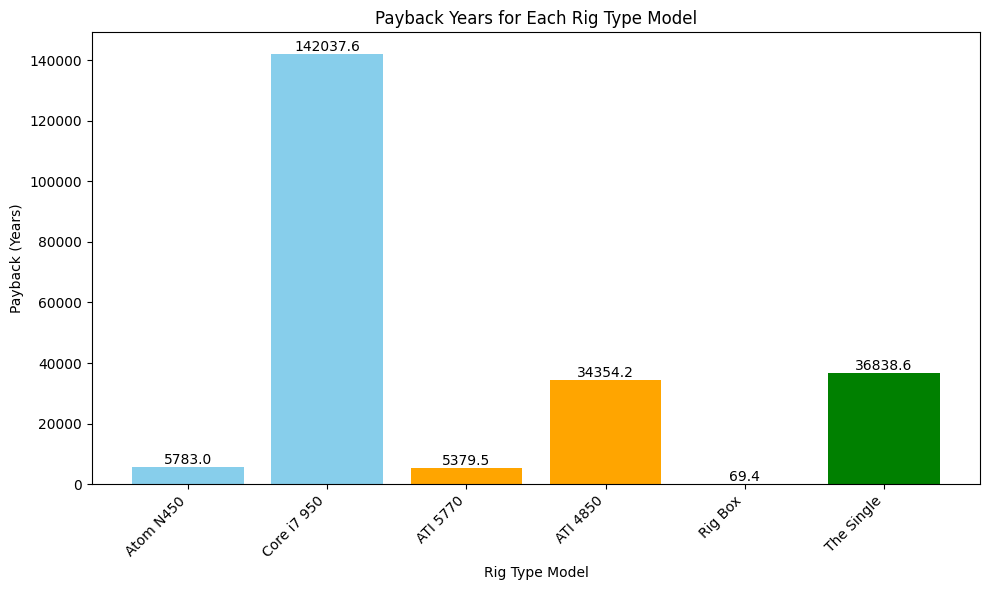

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_payback_period_by_release_with_groups(
    df, 
    release_column='Release', 
    model_column='Model', 
    payback_column='Payback_Period',
    model_groups=None
):
    """
    Plot payback years for each model ordered by release date, with specified model groups having the same color.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing model, release date, and payback period data.
        release_column (str): The name of the column with release dates.
        model_column (str): The name of the column with model names.
        payback_column (str): The name of the column with payback period values.
        model_groups (dict): A dictionary where keys are group names and values are lists of model names that should have the same color.
        
    Returns:
        None: Displays a bar chart of payback years for each model.
    """
    # Ensure the release column is in datetime format
    df[release_column] = pd.to_datetime(df[release_column])

    # Sort the DataFrame by release date
    df_sorted = df.sort_values(by=release_column)

    # Define colors based on model groups
    color_palette = ['skyblue', 'orange', 'green', 'purple', 'blue', 'pink']
    color_map = {}
    
    if model_groups:
        for idx, (group, models) in enumerate(model_groups.items()):
            for model in models:
                color_map[model] = color_palette[idx % len(color_palette)]

    # Assign colors, using default if model not in groups
    colors = [color_map.get(model, 'grey') for model in df_sorted[model_column]]
    
    # Highlight the minimum payback period model
    min_payback_idx = df_sorted[payback_column].idxmin()
    colors[min_payback_idx] = 'red'

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_sorted[model_column], df_sorted[payback_column], color=colors)

    # Set labels and title
    plt.xlabel('Rig Type Model')
    plt.ylabel('Payback (Years)')
    plt.title('Payback Years for Each Rig Type Model')

    # Add payback period values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')

    # Rotate x-ticks for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Usage example
model_groups = {
    "Group1": ["Atom N450", "Core i7 950"],
    "Group2": ["ATI 5770", "ATI 4850"],
    "Group3": ["Rig Box", "The Single"]
}

# Assuming ASIC_df is your DataFrame
plot_payback_period_by_release_with_groups(ASIC_df, model_groups=model_groups)


In [128]:
cheaper_model = Yearly_revenue_perModel[Yearly_revenue_perModel['Model'] == min_payback_model]
cheaper_model

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
17,Rig Box,112883.397939,7833.6,7833600.0,69.395501


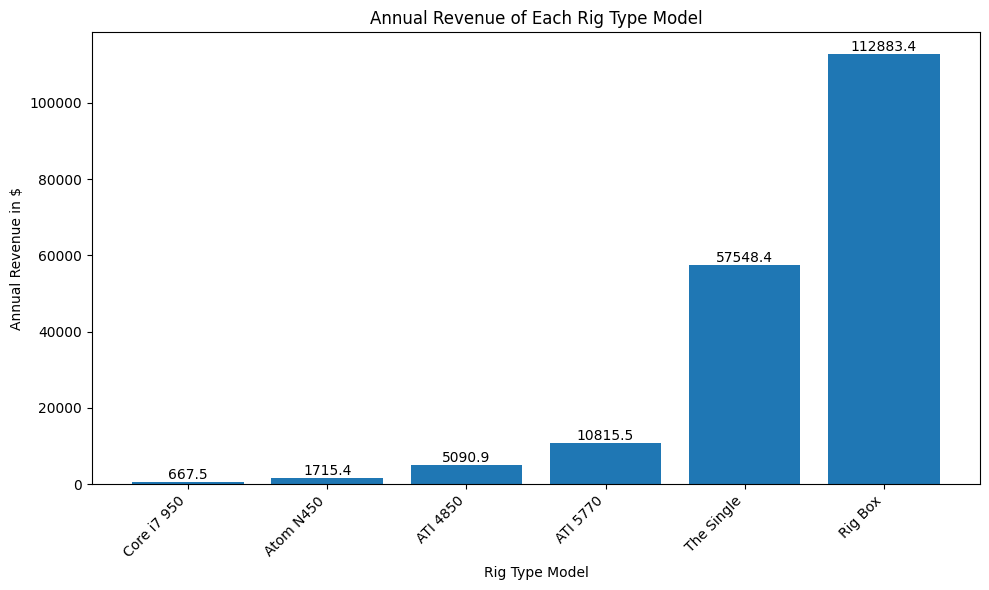

In [129]:
Yearly_revenue_perModel = Yearly_revenue_perModel[Yearly_revenue_perModel['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Rig Type Model')
plt.ylabel('Annual Revenue in $')
plt.title('Annual Revenue of Each Rig Type Model')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
